In [178]:
import pandas as pd
import numpy as np
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier

In [179]:
df=pd.read_csv(r"Master_attrition1.csv")
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [180]:
df.columns

Index(['EMP_ID', 'ANNUAL_RATE', 'HRLY_RATE', 'JOBCODE', 'ETHNICITY', 'SEX',
       'MARITAL_STATUS', 'JOB_SATISFACTION', 'AGE', 'NUMBER_OF_TEAM_CHANGED',
       'REFERRAL_SOURCE', 'HIRE_MONTH', 'REHIRE', 'TERMINATION_YEAR',
       'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'PERFORMANCE_RATING',
       'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL', 'STATUS',
       'JOB_GROUP', 'PREVYR_1', 'PREVYR_2', 'PREVYR_3', 'PREVYR_4', 'PREVYR_5',
       'A', 'B', 'C', 'D', 'E', 'experience'],
      dtype='object')

In [181]:
X=df.drop(['EMP_ID','STATUS','TERMINATION_YEAR','HIRE_MONTH','A', 'B', 'C', 'D', 'E'], axis=1)
y=df['STATUS']


In [182]:
X = pd.get_dummies(X, columns=['JOB_GROUP','ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'REFERRAL_SOURCE', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL'])

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [373]:
clf = MLPClassifier(activation = 'relu', solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(5,2), learning_rate='constant', max_iter=1000, random_state=42,warm_start=True)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [374]:
y_pred = clf.predict(X_test)

In [375]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [376]:
y_pred_proba = clf.predict_proba(X_test)

In [377]:
y_pred_proba

array([[0.65426742, 0.34573258],
       [0.95873832, 0.04126168],
       [0.39388601, 0.60611399],
       ...,
       [0.36732588, 0.63267412],
       [0.07020686, 0.92979314],
       [0.41661918, 0.58338082]])

In [378]:
print (accuracy_score(y_pred,y_test))

0.7125520110957004


In [379]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1291  334]
 [ 495  764]]


In [380]:
clf.score(X_test, y_test, sample_weight=None)

0.7125520110957004

LightGBM

In [223]:
import numpy as np
import pandas as pd
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split

In [224]:
df=pd.read_csv(r"Master_attrition1.csv")
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [225]:
X=df.drop(['EMP_ID','STATUS','TERMINATION_YEAR','HIRE_MONTH','A', 'B', 'C', 'D', 'E'], axis=1)
y=df['STATUS']

In [226]:
X = pd.get_dummies(X, columns=['JOB_GROUP','ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'REFERRAL_SOURCE', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL'])

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [228]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [229]:
gbm = lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=100,
                        learning_rate=0.03,
                        n_estimators=200)

In [230]:
gbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=100, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [231]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

[1]	valid_0's l1: 0.487898	valid_0's l2: 0.241612
Training until validation scores don't improve for 5 rounds
[2]	valid_0's l1: 0.483581	valid_0's l2: 0.237525
[3]	valid_0's l1: 0.479002	valid_0's l2: 0.233291
[4]	valid_0's l1: 0.474615	valid_0's l2: 0.229351
[5]	valid_0's l1: 0.470439	valid_0's l2: 0.225729
[6]	valid_0's l1: 0.466337	valid_0's l2: 0.222284
[7]	valid_0's l1: 0.462431	valid_0's l2: 0.219121
[8]	valid_0's l1: 0.458535	valid_0's l2: 0.216012
[9]	valid_0's l1: 0.454674	valid_0's l2: 0.213039
[10]	valid_0's l1: 0.451145	valid_0's l2: 0.210443
[11]	valid_0's l1: 0.447518	valid_0's l2: 0.207777
[12]	valid_0's l1: 0.444203	valid_0's l2: 0.20547
[13]	valid_0's l1: 0.440686	valid_0's l2: 0.203038
[14]	valid_0's l1: 0.437217	valid_0's l2: 0.20068
[15]	valid_0's l1: 0.434043	valid_0's l2: 0.198637
[16]	valid_0's l1: 0.431013	valid_0's l2: 0.196709
[17]	valid_0's l1: 0.428003	valid_0's l2: 0.19485
[18]	valid_0's l1: 0.425027	valid_0's l2: 0.193066
[19]	valid_0's l1: 0.422107	valid_

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.03, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=100, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [232]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [233]:
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

The rmse of prediction is: 0.39586798193262435


In [234]:
print('Feature importances:', list(gbm.feature_importances_))

Feature importances: [2094, 1001, 2787, 270, 1128, 29, 429, 502, 288, 233, 171, 70, 348, 12, 23, 0, 0, 17, 0, 0, 0, 28, 72, 31, 58, 0, 18, 55, 55, 70, 15, 34, 3, 37, 0, 6, 31, 108, 0, 21, 60, 0, 0, 0, 0, 1, 0, 55, 34, 66, 27, 141, 9, 15, 17, 33, 116, 38, 0, 30, 121, 22, 12, 5, 64, 56, 166, 0, 0, 35, 27, 0, 0, 0, 136, 0, 0, 0, 35, 0, 0, 46, 32, 56, 0, 3, 193, 188, 0, 42, 165, 138, 81, 83, 54, 42, 71, 28, 11, 18, 23, 18, 48, 23, 39, 52, 25, 17, 16, 15, 23, 13, 8, 25, 25, 14, 10, 0, 95, 0, 63, 0, 49, 0, 135, 99, 119, 46, 46]


In [235]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_pred.round(),y_test))

0.7749653259361997


In [236]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred.round()))

[[1378  247]
 [ 402  857]]


In [263]:
results=pd.DataFrame()
# print(pd.DataFrame(X_train))
results['columns']=(pd.DataFrame(X_train)).columns
print(type(results['columns']))
results['importances'] = gbm.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)
results[:20]

<class 'pandas.core.series.Series'>


,columns,importances
2,2,2787
0,0,2094
4,4,1128
1,1,1001
7,7,502
6,6,429
12,12,348
8,8,288
3,3,270
9,9,233


LGBM GridSearchCV

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
gbm_model = lgb.LGBMRegressor()
gbm_grid = [{
'boosting_type': ['gbdt'],
'n_estimators':[200],
'learning_rate':[0.03],
'num_leaves':[100],
'objective': ['binary']
}]

gridsearchGBM  = GridSearchCV(gbm_model, gbm_grid, cv=3,verbose=3)

#run the grid search
gridsearchGBM.fit(X_train, y_train)

y_pred = gridsearchGBM.predict(X_test)
print(gridsearchGBM.best_params_)

print (accuracy_score(y_pred.round(),y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary, score=0.314, total=   0.8s
[CV] boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary, score=0.295, total=   1.0s
[CV] boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  boosting_type=gbdt, learning_rate=0.03, n_estimators=200, num_leaves=100, objective=binary, score=0.330, total=   0.8s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.6s finished


{'boosting_type': 'gbdt', 'learning_rate': 0.03, 'n_estimators': 200, 'num_leaves': 100, 'objective': 'binary'}
0.7721914008321775


In [148]:
from sklearn import metrics
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
print(); print(model)
    
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)
    
# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1625
           1       0.77      0.66      0.71      1259

    accuracy                           0.77      2884
   macro avg       0.77      0.75      0.76      2884
weighted avg       0.77      0.77      0.76      2884


[[1376  249]
 [ 428  831]]


XG Boost Code From Bhuvana

In [257]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [258]:
y_pred = xgb_model.predict(x_test)

In [259]:
print (accuracy_score(y_pred,y_test))

0.7493065187239945


<Figure size 2160x2160 with 0 Axes>

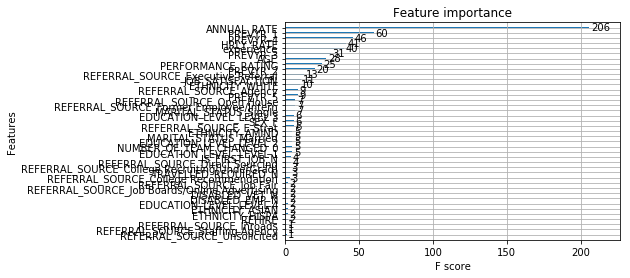

In [208]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

from matplotlib.pyplot import figure
fig= plt.figure(figsize=(30,30))

# plot feature importance
plot_importance(xgb_model)
pyplot.show()

<Figure size 1800x1800 with 0 Axes>

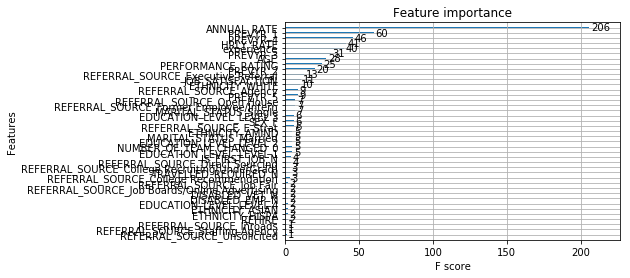

In [214]:
fig = plt.gcf()
fig.set_size_inches(25, 25,forward=True)
plot_importance(xgb_model)
pyplot.show()


In [82]:
print(precision_recall_fscore_support(y_pred,y_test))

(array([0.69415385, 0.56870532]), array([0.67504488, 0.59027205]), array([0.68446602, 0.57928803]), array([1671, 1213], dtype=int64))


In [83]:
print(precision_recall_fscore_support(y_test,y_pred))

(array([0.67504488, 0.59027205]), array([0.69415385, 0.56870532]), array([0.68446602, 0.57928803]), array([1625, 1259], dtype=int64))


###EDA


In [143]:
##logistic regression

from sklearn.linear_model import LogisticRegression
x_train=x_train.drop(['ANNUAL_RATE'],axis=1)
x_test=x_test.drop(['ANNUAL_RATE'],axis=1)

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred=clf.predict(x_test)

#y_pred=clf.predict_proba(x_test)


print (accuracy_score(y_pred,y_test))

C:\Users\Bhuvana Vellanki\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6161581137309292


In [184]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#x_train=x_train.drop(['ANNUAL_RATE'],axis=1)
#x_test=x_test.drop(['ANNUAL_RATE'],axis=1)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
neigh.score(y_pred,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 1 ... 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [185]:
y_test.to_numpy()

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [186]:
print (accuracy_score(y_pred,y_test))

0.5721220527045769


In [130]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

[[1079  546]
 [ 678  581]]


###Random forest


In [244]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 


rf_model = RandomForestRegressor(random_state=5,max_depth=15,n_estimators=150 )
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)



In [235]:
print (accuracy_score(y_pred.round(),y_test))

0.6331484049930652
